# Описание датасета 
Посмотрим на переменные, которые содержит датасет:

1. school  — аббревиатура школы, в которой учится ученик
2. sex — пол ученика ('F' - женский, 'M' - мужской)
3. age — возраст ученика (от 15 до 22)
4. address — тип адреса ученика ('U' - городской, 'R' - за городом)
5. famsize — размер семьи('LE3' <= 3, 'GT3' >3)
6. Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
7. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
8. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
9. Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
10. Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
11. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
12. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
13. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
14. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
15. failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
16. schoolsup — дополнительная образовательная поддержка (yes или no)
17. famsup — семейная образовательная поддержка (yes или no)
18. paid — дополнительные платные занятия по математике (yes или no)
19. activities — дополнительные внеучебные занятия (yes или no)
20. nursery — посещал детский сад (yes или no)
21. higher — хочет получить высшее образование (yes или no)
22. internet — наличие интернета дома (yes или no)
23. romantic — в романтических отношениях (yes или no)
24. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
25. freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
26. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
27. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
28. absences — количество пропущенных занятий
29. score — баллы по госэкзамену по математике

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

math_data = pd.read_csv('stud_math.csv')
math_data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [2]:
math_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

In [3]:
math_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


Кол-во строковых столбцов: 17 Кол-во числовых столбцов, 13 Номинативные переменные. 
Для дальнейшего удобства работы с данными переименуем названия столбцов на названия происными буквами.

In [4]:
math_data.columns = [x.lower() for x in math_data.columns]
#переименуем название столбца содержащую запятую
math_data.columns.values[20] = 'studytime_granular'
math_data.describe()

,age,medu,fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


Проверим сколько процентов данных пропущенно.

In [5]:
size = len(math_data)
math_data.isnull().sum().apply(lambda x: round(x * 100 / size, 2))

school                 0.00
sex                    0.00
age                    0.00
address                4.30
famsize                6.84
pstatus               11.39
medu                   0.76
fedu                   6.08
mjob                   4.81
fjob                   9.11
reason                 4.30
guardian               7.85
traveltime             7.09
studytime              1.77
failures               5.57
schoolsup              2.28
famsup                 9.87
paid                  10.13
activities             3.54
nursery                4.05
studytime_granular     1.77
higher                 5.06
internet               8.61
romantic               7.85
famrel                 6.84
freetime               2.78
goout                  2.03
health                 3.80
absences               3.04
score                  1.52
dtype: float64

Без пропусков только столбцы school, sex и age. Столбцы pstatus и paid содержат около 10% пропусковб что довольно много.
 
<hr>
# Анализ данных
## Первичная обработка данных для анализа данных

In [6]:
def statValues(series):
    mu = series.mean()
    medi = series.median()
    sigma = series.std()
    setSize = len(series)
    mode = series.mode()

    return mu, medi, sigma, setSize, mode


def strPlt(statValueTuple):
    textstr = '\n'.join((r'$\mu=%.2f$' % (statValueTuple[0]),
                         r'$\mathrm{median}=%.2f$' % (statValueTuple[1]),
                         r'$\sigma=%.2f$' % (statValueTuple[2]),
                         r'$sample=%d$' % (statValueTuple[3], ),
                         r'$mode=%.2f$' % (statValueTuple[4], )
                         ))
    return textstr


def quantiles(columns):
    IQR = columns.quantile(0.75) - columns.quantile(0.25)
    perc_25 = columns.quantile(0.25)
    perc_75 = columns.quantile(0.75)
    right = perc_25 - 1.5*IQR
    left = perc_75 + 1.5*IQR
    return right, left, ('25-й перцентиль: {},'.format(perc_25)+' 75-й перцентиль: {},'.format(perc_75)
                         + ' IQR: {}, '.format(IQR) +
                         ' Границы выбросов: [{}, {}].'.format(right,
                                                               left)
                         )


def unknown_toMostFrequent(columnname):
    most_frequent = math_data[columnname].value_counts().index[0]
    math_data[columnname] = math_data[columnname].apply(
        lambda x: most_frequent if pd.isna(x) else x)


def unknown_toValue(columnname, value):
    math_data[columnname] = math_data[columnname].apply(
        lambda x: value if pd.isna(x) else x)

## Обработка каждого столбца
### studytime_granular
Начнем с studytime_granul
ar, т.к. описания данного столбца нет. Судя по названию есть вероятность, что он связан с studytime. Построим на сколько они скоррелированы.

In [7]:
math_data['studytime_granular'].corr(math_data['studytime'])

-0.9999999999999991

Стобцы сильно коррелируют, поэтому нет необходимости в рассмотрении обоих столбцов. Один из столбцов можно удалить, непотеряв важной информации о датасете.
Я предпочту удалить столбец *studytime_granular*, т.к. его описания нет.

In [8]:
math_data.drop('studytime_granular', inplace=True, axis=1)

Далее будем рассматривать столбцы в порядке из описания.
### school
Столбец без пропусков. Посмотрим, какие значения он несёт и нормализуем их.

In [9]:
math_data.school.value_counts(normalize=True)

GP    0.883544
MS    0.116456
Name: school, dtype: float64

Данные собраны о 2-х школах, причем, 88.4% это данные о школе GP и 11.6%  соответственно MS.
Можно сразу сравнить средние баллы по госэкзамену по математике (score) в каждой из школ.

In [10]:
math_data[['school', 'score']].groupby(by=['school']).mean()

,score
school,
GP,52.630814
MS,49.444444


Средний балл по госэкзамену по математике (score) в каждой из школ примерно одинаков, хотя выборка в школе MS существенно меньше.

### sex

In [11]:
math_data.sex.value_counts(dropna=False, normalize=True)

F    0.526582
M    0.473418
Name: sex, dtype: float64

Пропусков нет. Из значений видно, что полы распределены почти по ровну.
По аналогии можно сразу рассмотреть средние баллы по госэкзамену по математике (score) среди учеников и учениц.

In [12]:
math_data[['sex', 'score']].groupby(by=['sex']).mean()

,score
sex,
F,50.098039
M,54.648649


У учеников средний бал чуть выше, чем у учениц.

### age
Посмотрим на возрастное распределение учеников в каждой из школ и в обоих школах.

In [13]:
math_data.age.value_counts(dropna=False, normalize=True)

16    0.263291
17    0.248101
18    0.207595
15    0.207595
19    0.060759
20    0.007595
22    0.002532
21    0.002532
Name: age, dtype: float64

Построим гистограммы для значения age.

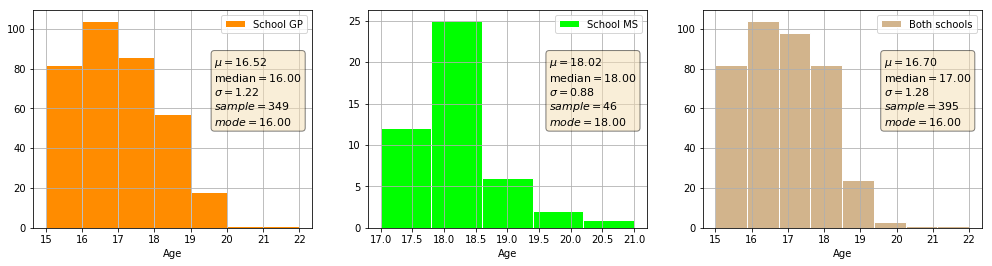

In [14]:
age_distribution = pd.Series([math_data.age[math_data.school == 'GP'],
                              math_data.age[math_data.school == 'MS'],
                              math_data.age
                              ])

legend = ['School GP', 'School MS', 'Both schools']
colour = ['darkorange', 'lime', 'tan']

fig, axs = plt.subplots(1, 3, figsize=(17, 4))

for i in range(3):
    axs[i].hist(age_distribution[i], bins=len(age_distribution[i].value_counts()),
                edgecolor='white', color=colour[i]
                )
    axs[i].legend({legend[i]})
    axs[i].set_xlabel('Age')
    axs[i].grid(True)
    # create string for textbox in plot 
    text = strPlt(statValues(age_distribution[i]))

    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    # place a text box in upper left in axes coords
    axs[i].text(0.65, 0.8, text, transform=axs[i].transAxes, fontsize=11,
                verticalalignment='top', bbox=props)
plt.show()
fig.clf()

Как видно из гисторграмм все распределения без выбросов и симметриные.
Проверим границы выбросов:

In [15]:
quantiles(math_data.age)

(13.0,
 21.0,
 '25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].')

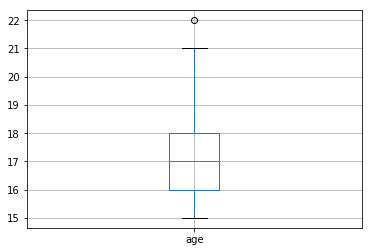

In [16]:
math_data.boxplot(column='age')

In [17]:
quantiles(math_data.age)

(13.0,
 21.0,
 '25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].')

По формуле интерквартильного расстояния и боксплота 22 является выбросом. Можно отфильтровать этот выброс, но в описании датасета разброс возраста включают 22 года, оставим этот выброс (В идеале можно было бы рассмотреть две модели с выбросом и без выброса в стобце age).
### address

In [18]:
math_data.address.value_counts(dropna=False, normalize=True)

U      0.746835
R      0.210127
NaN    0.043038
Name: address, dtype: float64

В столбце есть пропущенные значения. Есть 2 варианта обработки столбца adress.
1.  Значения столбца могут быть получены из известных значений столбца времени пути до школы, с учётом того, что большинство учеников, которые добираются меньше, чем за 15 минут живут в городе. Т.е ученикам с пропущенным значением адреса и небольшим временем дороги до школы можно выставить адрес U. 
2. Пропущенных значений не очень много, поэтому заменим значения на часто встречающееся.
 
Здесь представлен 2 вариант обработки.

In [19]:
unknown_toMostFrequent('address')

Посмотрим на процентное содержание места жительства учеников в обоих школах.

In [20]:
math_data.address.value_counts(dropna=False, normalize=True)

U    0.789873
R    0.210127
Name: address, dtype: float64

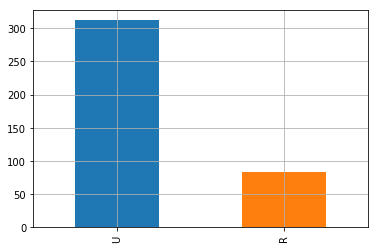

In [21]:
math_data['address'].value_counts().plot(kind='bar', grid=True)

Большинство учеников живет в городе.
### famsize

In [22]:
math_data.famsize.value_counts(dropna=False, normalize=True)

GT3    0.660759
LE3    0.270886
NaN    0.068354
Name: famsize, dtype: float64

В данных есть пропуски, заменим их на самое часто встречающееся значение.

In [23]:
unknown_toMostFrequent('famsize')
math_data.famsize.value_counts(dropna=False, normalize=True)

GT3    0.729114
LE3    0.270886
Name: famsize, dtype: float64

Большинство студентов ~73%, живут в семьях, где 4 и более человек.

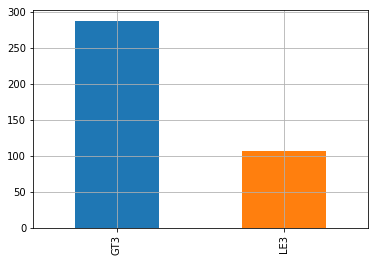

In [24]:
math_data['famsize'].value_counts().plot(kind='bar', grid=True)

### pstatus

In [25]:
math_data.pstatus.value_counts(dropna=False, normalize=True)

T      0.794937
NaN    0.113924
A      0.091139
Name: pstatus, dtype: float64

Много пропущенных значений (11%). Выделим их в отдельную категорию.

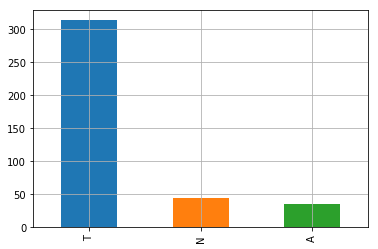

In [26]:
math_data.pstatus = math_data.pstatus.fillna('N')
math_data['pstatus'].value_counts().plot(kind='bar', grid=True)

79 % семей полные и живут вместе. Оставшиеся 21% почти поровну разделились между семьями живущими по отдельности (9%) и отстутсвие значения (11%). Неизвестные значения столбца оставлены в датасете и будут учитываться в дальнейшей обработке.
### medu

In [27]:
math_data.medu.value_counts(dropna=False, normalize=True)

 4.0    0.331646
 2.0    0.258228
 3.0    0.245570
 1.0    0.149367
 0.0    0.007595
NaN     0.007595
Name: medu, dtype: float64

Пропущенных значений менее 1%, заменим их на самое часто встречающееся значение столбца.

In [28]:
unknown_toMostFrequent('medu')
math_data.medu.value_counts(dropna=False, normalize=True)

4.0    0.339241
2.0    0.258228
3.0    0.245570
1.0    0.149367
0.0    0.007595
Name: medu, dtype: float64

Посмотрим на бокс плот и гистограмму этого столбца.

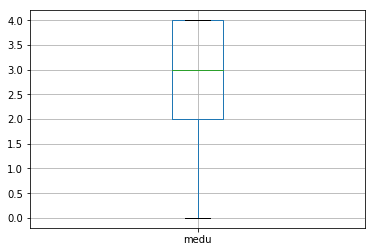

In [29]:
math_data.boxplot(column='medu')

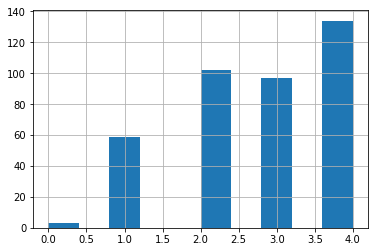

In [30]:
math_data.medu.hist()

35% матерей имеют высшее образование и менее 1% не имеют образования. Распределение значения medu явно смещено отрицательно.
### fedu

In [31]:
math_data.fedu.value_counts(dropna=False, normalize=True)

 2.0     0.268354
 3.0     0.243038
 4.0     0.222785
 1.0     0.197468
NaN      0.060759
 0.0     0.005063
 40.0    0.002532
Name: fedu, dtype: float64

Пропущенных значений 6%, заменим пропущенные значения на самое частое значение столбца.

In [32]:
unknown_toMostFrequent('fedu')

В описании значения лежат в интервале от  0 до 4. Но есть значение 40, которое, скорее всего является ошибкой и скорее всего должно быть 4, заменим его.

In [33]:
math_data.fedu = math_data.fedu.replace(40, 4)

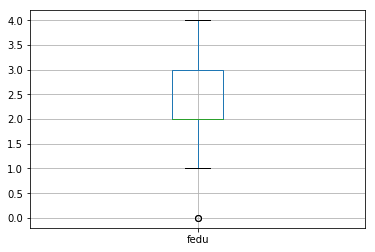

In [34]:
math_data.boxplot(column='fedu')

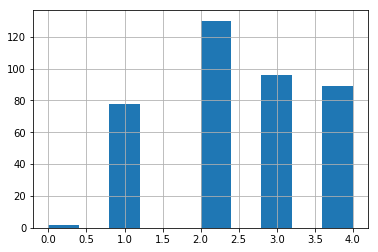

In [35]:
math_data.fedu.hist()

Значение 0, как видно из бокс-плота является выбросом, но в описании это значение есть, поэтому оставим его в датасете.

In [36]:
math_data.fedu.value_counts(dropna=False, normalize=True)

2.0    0.329114
3.0    0.243038
4.0    0.225316
1.0    0.197468
0.0    0.005063
Name: fedu, dtype: float64

Значения распределены довольно равномерно, большинство отцов ~ 33% закончило от 2 до 9 классов.
### mjob

In [37]:
math_data.mjob.value_counts(dropna=False, normalize=True)

other       0.336709
services    0.248101
at_home     0.146835
teacher     0.139241
health      0.081013
NaN         0.048101
Name: mjob, dtype: float64

Есть пропуски. Заменим пропуски на значение other.

In [38]:
unknown_toValue('mjob', 'other')

In [39]:
math_data.mjob.value_counts(dropna=False, normalize=True)

other       0.384810
services    0.248101
at_home     0.146835
teacher     0.139241
health      0.081013
Name: mjob, dtype: float64

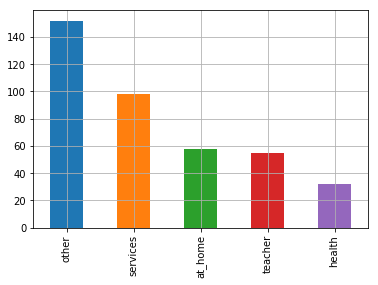

In [40]:
math_data['mjob'].value_counts().plot(kind='bar', grid=True)

Выбросов нет.
### fjob

In [41]:
math_data.fjob.value_counts(dropna=False, normalize=True)

other       0.498734
services    0.258228
NaN         0.091139
teacher     0.073418
at_home     0.040506
health      0.037975
Name: fjob, dtype: float64

По аналогии с предыдущей колонкой mjob, заменим пропуски на other.

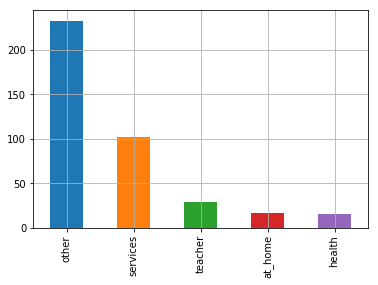

In [42]:
unknown_toValue('fjob', 'other')
math_data['fjob'].value_counts().plot(kind='bar', grid=True)

Выбросов нет. 50% отцов работают в категории other.
### reason

In [43]:
math_data.reason.value_counts(dropna=False, normalize=True)

course        0.346835
home          0.263291
reputation    0.260759
other         0.086076
NaN           0.043038
Name: reason, dtype: float64

Заменим пропуски на other.

In [44]:
unknown_toValue('reason', 'other')

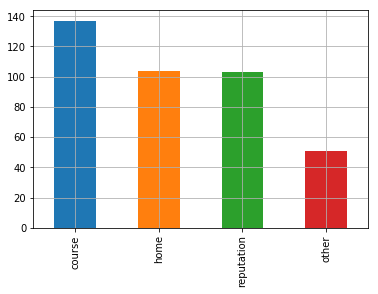

In [45]:
math_data['reason'].value_counts().plot(kind='bar', grid=True)

Выбросов нет.

In [46]:
math_data.reason.value_counts(dropna=False, normalize=True)

course        0.346835
home          0.263291
reputation    0.260759
other         0.129114
Name: reason, dtype: float64

 35% - 'course' - образовательная программа, наичастая причина при выборе школы.
 ### guardian
 Проверим есть ли неизвестные значения.

In [47]:
math_data.guardian.value_counts(dropna=False, normalize=True)

mother    0.632911
father    0.217722
NaN       0.078481
other     0.070886
Name: guardian, dtype: float64

Заменим пропуски на other.

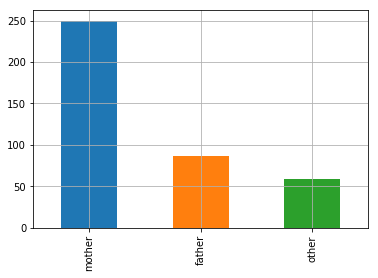

In [48]:
unknown_toValue('guardian', 'other')
math_data['guardian'].value_counts().plot(kind='bar', grid=True)

Выбросов нет.
### traveltime

In [49]:
math_data.traveltime.value_counts(dropna=False, normalize=True)

 1.0    0.612658
 2.0    0.243038
NaN     0.070886
 3.0    0.055696
 4.0    0.017722
Name: traveltime, dtype: float64

 Заменяем неизвестные значения на самое частое.

1.0    0.683544
2.0    0.243038
3.0    0.055696
4.0    0.017722
Name: traveltime, dtype: float64

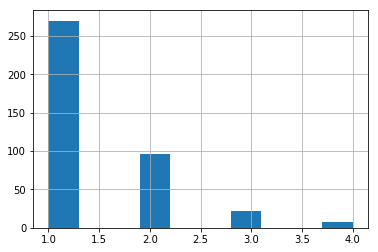

In [50]:
unknown_toMostFrequent('traveltime')
math_data.traveltime.hist()
math_data.traveltime.value_counts(dropna=False, normalize=True)

Выбросов нет. Большинство учеников (~68%) живут рядом со школой.
### studytime

In [51]:
math_data.studytime.value_counts(dropna=False, normalize=True)

 2.0    0.491139
 1.0    0.260759
 3.0    0.162025
 4.0    0.068354
NaN     0.017722
Name: studytime, dtype: float64

Заменяем неизвестные значения на самое частое.

2.0    0.508861
1.0    0.260759
3.0    0.162025
4.0    0.068354
Name: studytime, dtype: float64

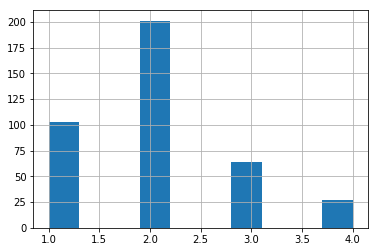

In [52]:
unknown_toMostFrequent('studytime')
math_data.studytime.hist()
math_data.studytime.value_counts(dropna=False, normalize=True)

Выбросов нет. Большинство учеников тратит на учебу от 2 до 5 часов.
### failures

In [53]:
math_data.failures.value_counts(dropna=False, normalize=True)

 0.0    0.741772
 1.0    0.124051
NaN     0.055696
 2.0    0.040506
 3.0    0.037975
Name: failures, dtype: float64

Большинство значений приходится на значение 0. Есть пропуски, заменяем их на наиболее часто встречающееся значение.

In [54]:
unknown_toMostFrequent('failures')
math_data.failures.value_counts(dropna=False, normalize=True)

0.0    0.797468
1.0    0.124051
2.0    0.040506
3.0    0.037975
Name: failures, dtype: float64

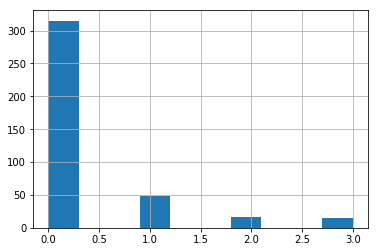

In [55]:
math_data.failures.hist()

Большинство учеников (~ 80%) не имеют внеучебных неудач, т.е все неудачи они связывают с учёбой.
### schoolsup

In [56]:
math_data.schoolsup.value_counts(dropna=False, normalize=True)

no     0.848101
yes    0.129114
NaN    0.022785
Name: schoolsup, dtype: float64

Есть пропуски. У 85% учеников нет дополнительной образовательной поддержки. Удаление этого столбца не сильно повлияет на анализ данных.

In [57]:
math_data.drop(['schoolsup'], axis=1, inplace=True)
math_data.head(2)

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,GT3,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,N,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0


### famsup

In [58]:
math_data.famsup.value_counts(dropna=False, normalize=True)

yes    0.554430
no     0.346835
NaN    0.098734
Name: famsup, dtype: float64

Выбросов нет. Пропущенные значения есть. Пропущенных значений колонки famsup почти 10%, это довольно много, выделим их в отдельную категорию.

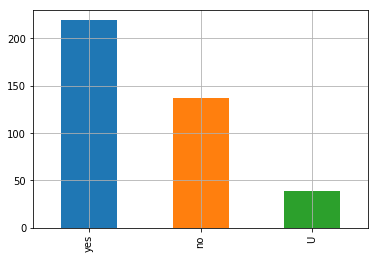

In [59]:
math_data.famsup = math_data.famsup.fillna('U')
math_data['famsup'].value_counts().plot(kind='bar', grid=True)

~55% учеников получают поддержку семьи.
### paid

In [60]:
math_data.paid.value_counts(dropna=False, normalize=True)

no     0.506329
yes    0.392405
NaN    0.101266
Name: paid, dtype: float64

Много пропусков 10%, которые выделяем в отдельную категорию.

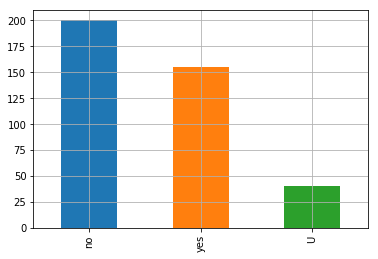

In [61]:
math_data.paid = math_data.paid.fillna('U')
math_data['paid'].value_counts().plot(kind='bar', grid=True)

Примерно 50% учеников не получают платных уроков, 40% учеников получают платные занятия.
### activities

In [62]:
math_data.activities.value_counts(dropna=False, normalize=True)

yes    0.493671
no     0.470886
NaN    0.035443
Name: activities, dtype: float64

 Данные распределены практически поровну. Есть пропущенные значения, заменим пропущенные значения на наиболее часто встречающееся значение.

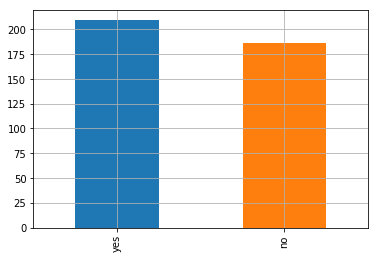

In [63]:
unknown_toMostFrequent('activities')
math_data['activities'].value_counts().plot(kind='bar', grid=True)

In [64]:
math_data.activities.value_counts(dropna=False, normalize=True)

yes    0.529114
no     0.470886
Name: activities, dtype: float64

### nursery

In [65]:
math_data.nursery.value_counts(dropna=False, normalize=True)

yes    0.759494
no     0.200000
NaN    0.040506
Name: nursery, dtype: float64

Есть пропущенные значения. Заменим пропущенные значения

yes    0.8
no     0.2
Name: nursery, dtype: float64

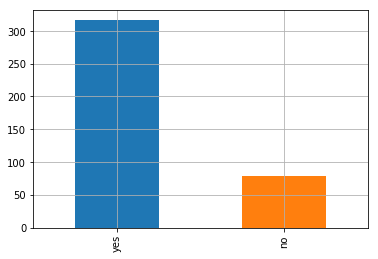

In [66]:
unknown_toMostFrequent('nursery')
math_data['nursery'].value_counts().plot(kind='bar', grid=True)
math_data.nursery.value_counts(dropna=False, normalize=True)

80% учеников посещали детский сад.
### higher

In [67]:
math_data.higher.value_counts(dropna=False, normalize=True)

yes    0.901266
NaN    0.050633
no     0.048101
Name: higher, dtype: float64

Т.к. почти 90% учеников хотят получить высшее образование, т.е. одинаковых данных очень мног, то их не стоит учитывать. Удалим этот столбец из датасета.

In [68]:
math_data.drop(['higher'], axis=1, inplace=True)
math_data.head(1)

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,famsup,paid,activities,nursery,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,GT3,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,no,no,no,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0


### internet

In [69]:
math_data.internet.value_counts(dropna=False, normalize=True)

yes    0.772152
no     0.141772
NaN    0.086076
Name: internet, dtype: float64

Есть пропущенные значения. Заменим пропущенные значения

yes    0.858228
no     0.141772
Name: internet, dtype: float64

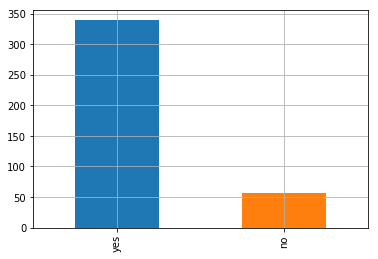

In [70]:
unknown_toMostFrequent('internet')
math_data['internet'].value_counts().plot(kind='bar', grid = True)
math_data.internet.value_counts(dropna=False, normalize=True)

85% учеников имеют интернет, 15% нет.
### romantic

In [71]:
math_data.romantic.value_counts(dropna=False, normalize=True)

no     0.607595
yes    0.313924
NaN    0.078481
Name: romantic, dtype: float64

есть пропущенные значения. Заменим пропущенные значения

no     0.686076
yes    0.313924
Name: romantic, dtype: float64

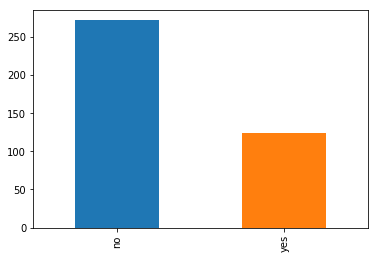

In [72]:
unknown_toMostFrequent('romantic')
math_data['romantic'].value_counts().plot(kind='bar')
math_data.romantic.value_counts(dropna=False, normalize=True)

Большинство учеников 67% не состоят в романтических отнощениях.
### famrel

In [73]:
math_data.famrel.value_counts(dropna=False, normalize=True)

 4.0    0.460759
 5.0    0.250633
 3.0    0.156962
NaN     0.068354
 2.0    0.043038
 1.0    0.017722
-1.0    0.002532
Name: famrel, dtype: float64

Значения должны быть в границе от 1 до 5 и -1 явно выбивается из этого. Предположим, что это ошибка и заменим -1 на 1.

In [74]:
math_data.famrel = math_data.famrel.replace(-1, 1)

Заменим пропуски

4.0    0.529114
5.0    0.250633
3.0    0.156962
2.0    0.043038
1.0    0.020253
Name: famrel, dtype: float64

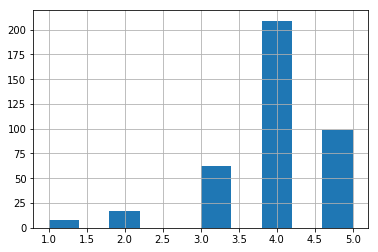

In [75]:
unknown_toMostFrequent('famrel')
math_data.famrel.hist()
math_data.famrel.value_counts(dropna=False, normalize=True)

Есть выбросы, заменим из на наиболее часто встречающееся значение.

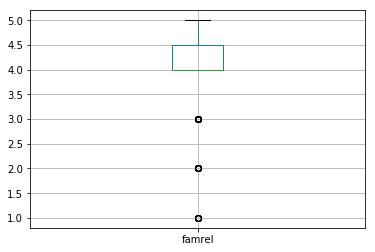

In [76]:
math_data.boxplot(column='famrel')

Выбросов стало еще больше, вероятно, не нужно было заменять значения. Посмотрим на процентное соотношение значений.

In [77]:
math_data.famrel.value_counts(dropna=False, normalize=True)

4.0    0.529114
5.0    0.250633
3.0    0.156962
2.0    0.043038
1.0    0.020253
Name: famrel, dtype: float64

Очень плохих семейныйх отношений стало на 2.5% больше, что было ожидаемо, хороших отношений стало более чем на 6.5% больше. Это может объясняснить увеличение выбросов.
### freetime

In [78]:
math_data.freetime.value_counts(dropna=False, normalize=True)

 3.0    0.387342
 4.0    0.283544
 2.0    0.159494
 5.0    0.096203
 1.0    0.045570
NaN     0.027848
Name: freetime, dtype: float64

Пропущенные значения, заменим из на наиболее часто встречающееся значение.

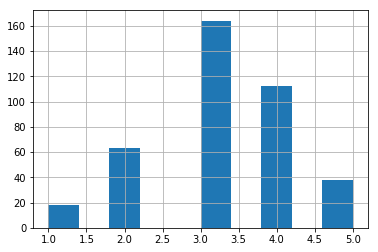

In [79]:
unknown_toMostFrequent('freetime')
math_data.freetime.hist()

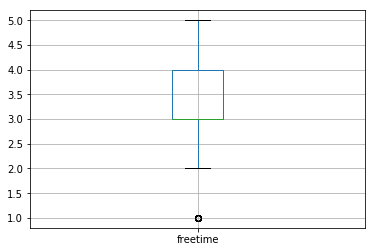

In [80]:
math_data.boxplot(column='freetime')

Есть выброс, но удалять его из датасета я не буду, это значение находиться в рамках возможных границ и не сильно повлияет на регрессионную модель.
### goout

In [81]:
math_data.goout.value_counts(dropna=False, normalize=True)

 3.0    0.321519
 2.0    0.255696
 4.0    0.212658
 5.0    0.131646
 1.0    0.058228
NaN     0.020253
Name: goout, dtype: float64

Пропущенные значения, заменим из на наиболее часто встречающееся значение.

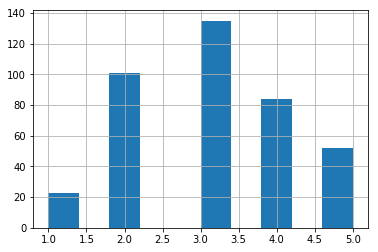

In [82]:
unknown_toMostFrequent('goout')
math_data.goout.hist()

Выбросов нет.
### health

In [83]:
math_data.health.value_counts(dropna=False, normalize=True)

 5.0    0.349367
 3.0    0.225316
 4.0    0.159494
 1.0    0.118987
 2.0    0.108861
NaN     0.037975
Name: health, dtype: float64

Пропущенные значения, заменим из на наиболее часто встречающееся значение.

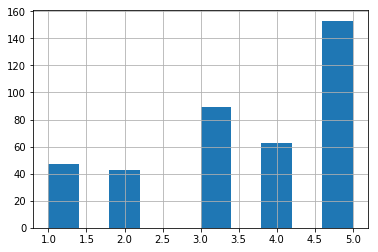

In [84]:
unknown_toMostFrequent('health')
math_data.health.hist()

 ВЫбросов нет.
 ### absences

In [85]:
math_data.absences.value_counts(dropna=False, normalize=True)

 0.0      0.281013
 2.0      0.151899
 4.0      0.134177
 6.0      0.078481
 8.0      0.053165
 10.0     0.043038
 12.0     0.030380
NaN       0.030380
 14.0     0.030380
 3.0      0.020253
 16.0     0.017722
 7.0      0.015190
 5.0      0.012658
 18.0     0.012658
 20.0     0.010127
 1.0      0.007595
 22.0     0.007595
 9.0      0.007595
 13.0     0.005063
 15.0     0.005063
 11.0     0.005063
 25.0     0.002532
 54.0     0.002532
 385.0    0.002532
 26.0     0.002532
 56.0     0.002532
 24.0     0.002532
 212.0    0.002532
 21.0     0.002532
 75.0     0.002532
 30.0     0.002532
 19.0     0.002532
 38.0     0.002532
 40.0     0.002532
 23.0     0.002532
 17.0     0.002532
 28.0     0.002532
Name: absences, dtype: float64

In [86]:
math_data.absences.isna().sum()

12

12 пропущенных значений. Предположим, что и пропусков было 0 (оптимистический вариант).

count    395.000000
mean       7.058228
std       23.138935
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

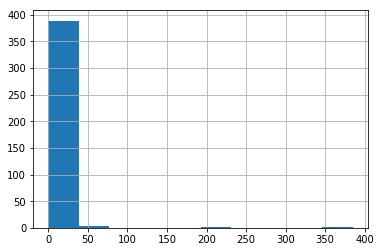

In [87]:
unknown_toValue('absences', 0)
math_data.absences.hist()
math_data.absences.describe()

In [88]:
quantiles(math_data.absences)

(-12.0,
 20.0,
 '25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].')

Отфильтруем значения по верхней границы выбросов.

In [89]:
math_data[math_data.absences > quantiles(math_data.absences)[1]
          ].absences.sort_values(ascending=False)

222    385.0
390    212.0
276     75.0
183     56.0
74      54.0
315     40.0
307     38.0
280     30.0
205     28.0
103     26.0
40      25.0
198     24.0
320     23.0
216     22.0
277     22.0
313     22.0
260     21.0
Name: absences, dtype: float64

Очевидно, что есть много выбросы в absenses. Наиболее очевидные - это два наибольших значения 212 и 385, удалим их.
 
Т.к. Все же значение более верхней границы выброса довольно много, лучше их оставить для анализа, а границей удаления выбросов взять наибольшее число пропусков (75).

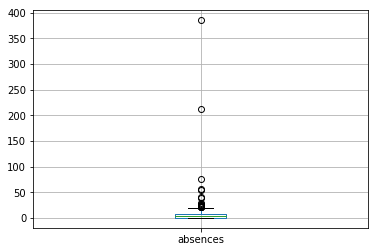

In [90]:
math_data = math_data[math_data.absences <= math_data[math_data.absences > quantiles(math_data.absences)[1]
                                                      ].absences.max()]
math_data.boxplot(column='absences')

Выбросы, все еще есть, т.к. я допустила достоверность этих значений, исходя из мысли, что таких значений довольно много.

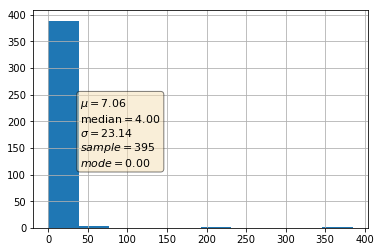

<function matplotlib.pyplot.clf()>

In [91]:
boxtext = strPlt(statValues(math_data.absences))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(40, 250, boxtext, fontsize=11,
         verticalalignment='top', bbox=props)
plt.hist(math_data.absences)
plt.grid(True)
plt.show()
plt.clf

Определенно распределение величины absences симметричное и смещенное вправо(положительно). Наиболее часто встречающееся значение 0 (нет пропусков).

In [92]:
math_data.absences.value_counts(dropna=False, normalize=True)

0.0      0.311392
2.0      0.151899
4.0      0.134177
6.0      0.078481
8.0      0.053165
10.0     0.043038
12.0     0.030380
14.0     0.030380
3.0      0.020253
16.0     0.017722
7.0      0.015190
5.0      0.012658
18.0     0.012658
20.0     0.010127
22.0     0.007595
9.0      0.007595
1.0      0.007595
15.0     0.005063
13.0     0.005063
11.0     0.005063
25.0     0.002532
54.0     0.002532
385.0    0.002532
26.0     0.002532
56.0     0.002532
24.0     0.002532
212.0    0.002532
21.0     0.002532
75.0     0.002532
30.0     0.002532
19.0     0.002532
38.0     0.002532
40.0     0.002532
23.0     0.002532
17.0     0.002532
28.0     0.002532
Name: absences, dtype: float64

Интересно, что все значения, которые теоретичесчи являются выбросами, имеют одинаковое %-ое содержание в датасете (~0.3%).
### score

In [93]:
math_data.score.value_counts(dropna=False, normalize=True)

 50.0     0.136709
 55.0     0.116456
 0.0      0.093671
 75.0     0.083544
 65.0     0.078481
 40.0     0.078481
 60.0     0.078481
 45.0     0.068354
 70.0     0.068354
 80.0     0.040506
 30.0     0.037975
 90.0     0.030380
 35.0     0.022785
 25.0     0.017722
NaN       0.015190
 85.0     0.015190
 95.0     0.012658
 100.0    0.002532
 20.0     0.002532
Name: score, dtype: float64

Есть пропуски, удалим их.

In [94]:
math_data.dropna(subset=['score'], inplace=True)
math_data.score.value_counts(dropna=False, normalize=True)

50.0     0.138817
55.0     0.118252
0.0      0.095116
75.0     0.084833
65.0     0.079692
40.0     0.079692
60.0     0.079692
70.0     0.069409
45.0     0.069409
80.0     0.041131
30.0     0.038560
90.0     0.030848
35.0     0.023136
25.0     0.017995
85.0     0.015424
95.0     0.012853
100.0    0.002571
20.0     0.002571
Name: score, dtype: float64

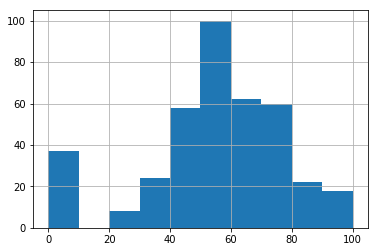

In [95]:
math_data.score.hist()

Проверим является ли значения 0 выбросоми.

In [96]:
quantiles(math_data.score)

(-5.0,
 115.0,
 '25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].')

Выбросов нет. Оценивался экзамен в 100 бальной системе. Судя повсему экзамен был довольно тяжелый, т.к. 14% учеников получили 50. Остальных значений еще меньше.
## Проверим данных после анализа столбцов

In [97]:
display(len(math_data.columns))
math_data.isnull().sum().apply(lambda x: round(x * 100 / size, 2))

27

school        0.0
sex           0.0
age           0.0
address       0.0
famsize       0.0
pstatus       0.0
medu          0.0
fedu          0.0
mjob          0.0
fjob          0.0
reason        0.0
guardian      0.0
traveltime    0.0
studytime     0.0
failures      0.0
famsup        0.0
paid          0.0
activities    0.0
nursery       0.0
internet      0.0
romantic      0.0
famrel        0.0
freetime      0.0
goout         0.0
health        0.0
absences      0.0
score         0.0
dtype: float64

In [98]:
math_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 27 columns):
school        389 non-null object
sex           389 non-null object
age           389 non-null int64
address       389 non-null object
famsize       389 non-null object
pstatus       389 non-null object
medu          389 non-null float64
fedu          389 non-null float64
mjob          389 non-null object
fjob          389 non-null object
reason        389 non-null object
guardian      389 non-null object
traveltime    389 non-null float64
studytime     389 non-null float64
failures      389 non-null float64
famsup        389 non-null object
paid          389 non-null object
activities    389 non-null object
nursery       389 non-null object
internet      389 non-null object
romantic      389 non-null object
famrel        389 non-null float64
freetime      389 non-null float64
goout         389 non-null float64
health        389 non-null float64
absences      389 non-null float64
sc

In [99]:
math_data.describe()

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
count,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000
mean,16.673522,2.776350,2.496144,1.403599,2.035990,0.308483,3.940874,3.218509,3.092545,3.586118,7.113111,52.262211
std,1.265662,1.095377,1.061564,0.676625,0.839575,0.712521,0.875850,0.982353,1.106062,1.403572,23.310047,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,4.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


## Вывод
Были устранены выбросы и заполнены пропуски, так же были удалены следующие столбцы: 'studytime, granular', 'schoolsup' и 'higher'. Количество уникальных значений сократилось на 3 значения.
 
Не все пропущенные значения удалось достоверно заполнить.
 
<hr>
# Анализ переменных влиящих на модель
## Первичная обработка для нализ переменных влиящих на модель

In [100]:
def get_stat_dif(column):
    cols = math_data.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(math_data.loc[math_data.loc[:, column] == comb[0], 'score'],
                     math_data.loc[math_data.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break


def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score', data=math_data, ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.grid()
    plt.show()

## Корреляционный анализ
Найдем численные переменные, которые статистически значимы для искомой переменной score.

In [101]:
math_data.describe()

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
count,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000
mean,16.673522,2.776350,2.496144,1.403599,2.035990,0.308483,3.940874,3.218509,3.092545,3.586118,7.113111,52.262211
std,1.265662,1.095377,1.061564,0.676625,0.839575,0.712521,0.875850,0.982353,1.106062,1.403572,23.310047,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,4.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


In [102]:
for col in ['age', 'medu', 'fedu', 'traveltime', 'studytime', 'failures', 'freetime', 'goout', 'health', 'absences']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки medu
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки absences


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\numpy\core\fromnumeric.py:3194: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_eq

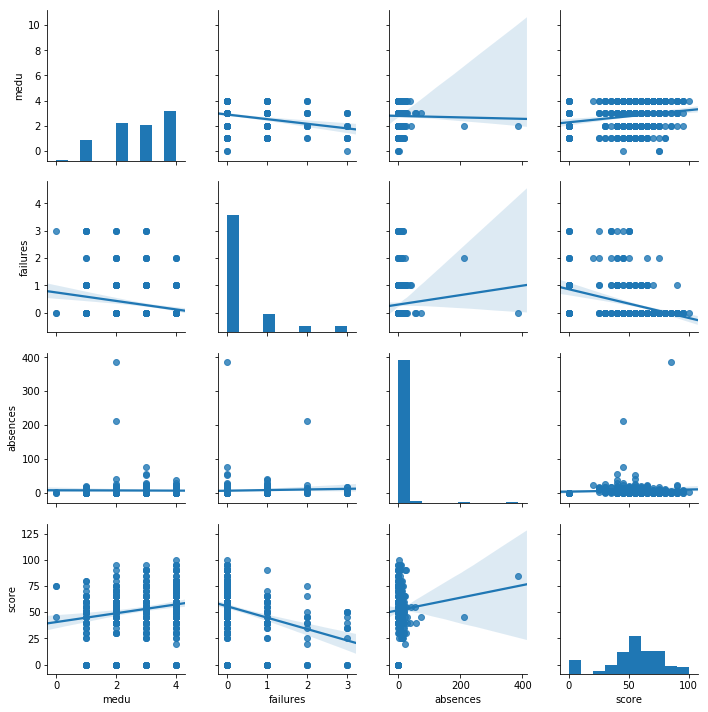

In [109]:
sns.pairplot(math_data[['medu', 'failures', 'absences',  'score']], kind='reg')

In [104]:
math_data[['medu','failures', 'absences', 'score']].corr()

,medu,failures,absences,score
medu,1.000000,-0.238295,-0.012331,0.200890
failures,-0.238295,1.000000,0.056706,-0.337187
absences,-0.012331,0.056706,1.000000,0.060932
score,0.200890,-0.337187,0.060932,1.000000


Корреляционный анализ показал, что искомая переменная score зависит от следующих числовых переменных absences, medu и failures.
## Анализ номинативных переменных
Найдем номинативные переменные, которые статистически значимыдля искомой переменной score.

In [105]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus',  'mjob', 'fjob',
            'reason', 'guardian', 'traveltime', 'studytime', 'famsup', 'paid', 'activities',
            'nursery', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки romantic


Проанализируем номинативные переменные: address, mjob и romantic. 
Для этого посмотрим на плотность распределения пременных.

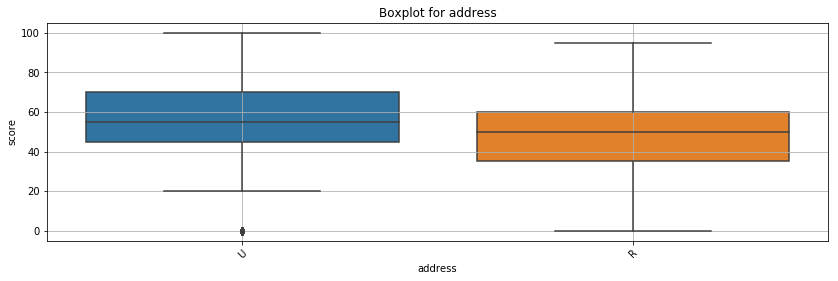

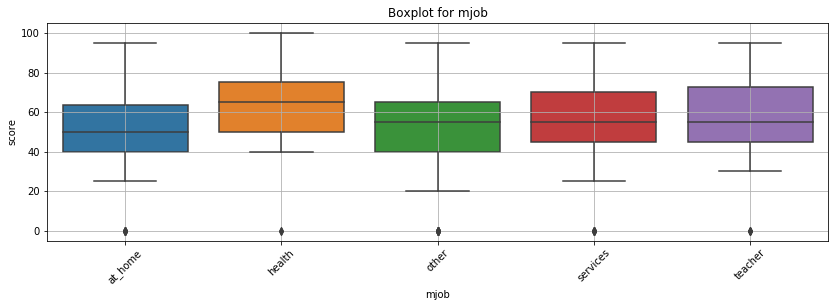

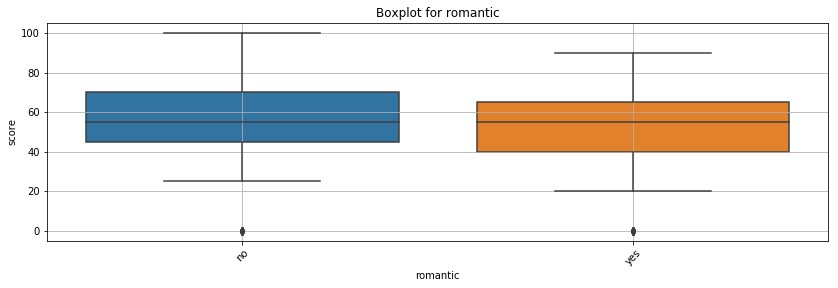

In [106]:
for col in ['address', 'mjob', 'romantic']:
    get_boxplot(col)

Анализ номинативных переменных показал, что искомая переменная score зависит от следующих переменных address, mjob (но не зависит снова, от fjob) и romantic (видимо, наличие романтических отношений не располагает к изучению математики, будьте внимательны!).

## Вывод
 
Интересно, что переменная score не сильно коррелирует с freetime, goout и fedu (хотя зависит от medu). Я предполагала, что переменная не будет сильно зависит от age и health (или есть способность или нет).
 
Наибольшую корреляцию оценка за экзамен имеет с количеством пропущенных зантий, что вполне естественно. Интересно, что оценка за экзамен обратно зависит от количества внеучебных неудач, т.е. чем больше внеучебных неудач у ученикатем лучше он справился с экзаменом. 

Так же очень интересно, что переменная score не сильно коррелирует с полом(sex), временем на учёбу помимо школы (studytime), поддержкой со стороны семьи (famsup) и получением учеников дополнительных оплачиваемых занятий (paid).
 
<hr>
# Итоги

In [107]:
result = math_data[['absences', 'medu', 'failures', 'address', 'mjob', 'romantic', 'score']]
result.head(10)

,absences,medu,failures,address,mjob,romantic,score
0,6.0,4.0,0.0,U,at_home,no,30.0
1,4.0,1.0,0.0,U,at_home,no,30.0
2,10.0,1.0,3.0,U,at_home,no,50.0
3,2.0,4.0,0.0,U,health,yes,75.0
4,4.0,3.0,0.0,U,other,no,50.0
5,10.0,4.0,0.0,U,services,no,75.0
6,0.0,2.0,0.0,U,other,no,55.0
7,6.0,4.0,0.0,U,other,no,30.0
8,0.0,3.0,0.0,U,services,no,95.0
9,0.0,3.0,0.0,U,other,no,75.0


Можно еще раз взглянуть на корреляцию переменной score с переменными, которые дали статистически значимые различия при анализе.

In [108]:
math_data[['absences', 'medu', 'failures', 'address', 'mjob', 'romantic', 'score']].corr()

,absences,medu,failures,score
absences,1.000000,-0.012331,0.056706,0.060932
medu,-0.012331,1.000000,-0.238295,0.200890
failures,0.056706,-0.238295,1.000000,-0.337187
score,0.060932,0.200890,-0.337187,1.000000


Наибольшее влияние оказывает переменная absences (посещяемость), далее на успеваемость вляет failures (количество внеучебных неудач, причем корреляция отрицательна) и medu (образование мамы).
 
**Выводы из анализ данных и переменных**
1. Данные содержат достаточно пропущенных значений, в 3 столбцах пропусков около 10%
2. Ошибок и выбросов мало, в основном они штучные
3. Данные в некоторых столбцах оказались слишком однородными

Влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике было отслеженно и наболее значимые факторы записаны в переменную result.